In [2]:
%matplotlib inline 
import matplotlib.pylab as plt

import pandas as pd
# import numpy as np

import requests
##  nice graphs design by Federika
s = requests.get("https://raw.githubusercontent.com/Casyfill/CUSP_templates/master/Py/fbMatplotlibrc.json").json()
plt.rcParams.update(s)

In [10]:
import os
PARQA = os.environ['parqa']

## I. Loading and Cleaning 311 data

In [15]:
path = PARQA + "data/2015_10_9_311_Service_Requests_from_2010_to_Present.csv"

df = pd.read_csv(path, na_values='Unspecified', dayfirst=False)

/Users/casy/anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2902: DtypeWarning: Columns (8,17,31,32,38,39,40,47,48,49) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


### parse timedata

In [19]:
# dateParse = lambda x: pd.datetime.strptime(x, '%m/%d/%Y %I:%M:%S %p')

df['Created Date'] = pd.to_datetime(df['Created Date'], format = '%m/%d/%Y %I:%M:%S %p')
df['year'] = df['Created Date'].apply(lambda x: x.year)

### TOBEDONE: Here gonna be export to HDF5 AND MONGHDB 

In [24]:
## Save to HDF5
# hdf5Path = PATH + "data/2015_10_9_311.h5"
# df.to_hdf(hdf5Path, 'data', mode='w', format='table')
# del df 

## II. Review datum

In [20]:
for i, x in enumerate(df.columns): print i,': ', x

0 :  Unique Key
1 :  Created Date
2 :  Closed Date
3 :  Agency
4 :  Agency Name
5 :  Complaint Type
6 :  Descriptor
7 :  Location Type
8 :  Incident Zip
9 :  Incident Address
10 :  Street Name
11 :  Cross Street 1
12 :  Cross Street 2
13 :  Intersection Street 1
14 :  Intersection Street 2
15 :  Address Type
16 :  City
17 :  Landmark
18 :  Facility Type
19 :  Status
20 :  Due Date
21 :  Resolution Description
22 :  Resolution Action Updated Date
23 :  Community Board
24 :  Borough
25 :  X Coordinate (State Plane)
26 :  Y Coordinate (State Plane)
27 :  Park Facility Name
28 :  Park Borough
29 :  School Name
30 :  School Number
31 :  School Region
32 :  School Code
33 :  School Phone Number
34 :  School Address
35 :  School City
36 :  School State
37 :  School Zip
38 :  School Not Found
39 :  School or Citywide Complaint
40 :  Vehicle Type
41 :  Taxi Company Borough
42 :  Taxi Pick Up Location
43 :  Bridge Highway Name
44 :  Bridge Highway Direction
45 :  Road Ramp
46 :  Bridge Highway S

In [21]:
df.head(2)

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location,year
0,31703390,2015-10-08 23:47:00,10/08/2015 11:47:00 PM,DSNY,Queens East 12,Derelict Vehicles,14 Derelict Vehicles,Street,11436,145-49 115 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,40.683453,-73.796956,"(40.68345291101772, -73.79695647540593)",2015
1,31704028,2015-10-08 02:46:12,NaN,DSNY,Department of Sanitation,Graffiti,Graffiti,Mixed Use,10025,174 WEST 107 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,40.800718,-73.964307,"(40.800717570722846, -73.9643071172048)",2015


## III. Parks

In [23]:
pdf = df[pd.notnull(df['Park Facility Name'])]
print len(pdf)
print 100.0 * len(pdf)/ len(df), '% of total'

66395
0.661919825703 % of total


In [24]:
# outPath = PATH + "data/2015_10_9_311_parks.csv"
# pdf.to_csv(outPath)

## complains per park

In [25]:
pdf['Park Facility Name'].value_counts()

Central Park                                                          2487
Riverside Park                                                        1186
Prospect Park                                                          930
Rockaway Beach Boardwalk                                               754
Flushing Meadows Corona Park                                           722
Beach - Brighton                                                       595
Hudson River Park                                                      484
Morningside Park                                                       430
Tompkins Square Park                                                   403
Marine Park                                                            400
Forest Park                                                            399
Van Cortlandt Park                                                     362
Washington Square Park                                                 361
Mccarren Park            

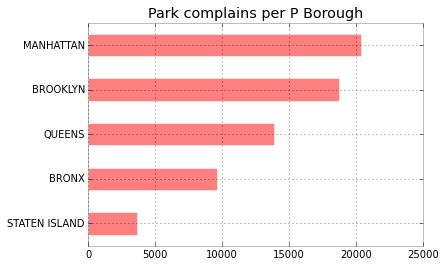

In [26]:
pdf['Park Borough'].value_counts(ascending=True).plot(kind='barh', color='red', alpha=.5, title='Park complains per P Borough');

In [27]:
x =  df['Park Borough'].value_counts()
y =  pdf['Park Borough'].value_counts()


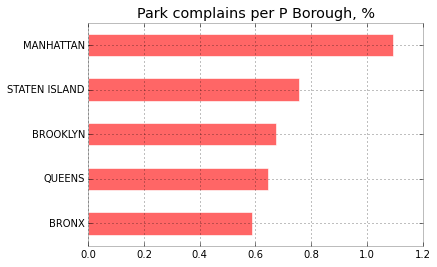

In [29]:
relative_complains = 100*y/x
relative_complains.sort_values(ascending=True, inplace=True)
relative_complains.plot(kind='barh', color='red', alpha=.6, title='Park complains per P Borough, %');

## IV. Types of complains

In [38]:
pdf.groupby('Agency')['Complaint Type'].value_counts()

Agency  Complaint Type               
DFTA    Senior Center Complaint           1254
DOE     School Maintenance                8938
        Safety                             540
        DOE Complaint or Compliment        465
        Discipline and Suspension          371
        Teaching/Learning/Instruction      364
        Health                             152
        Registration and Transfers         149
        Parent Leadership                   51
        No Child Left Behind                15
DPR     Maintenance or Facility          35727
        Violation of Park Rules           7350
        Animal in a Park                  7076
        DPR Internal                      2358
        Damaged Tree                       761
        Overgrown Tree/Branches            332
        Dead Tree                          296
        Illegal Tree Damage                179
        Root/Sewer/Sidewalk Condition       16
NYPD    Animal in a Park                     1
dtype: int64

## IV. Time series

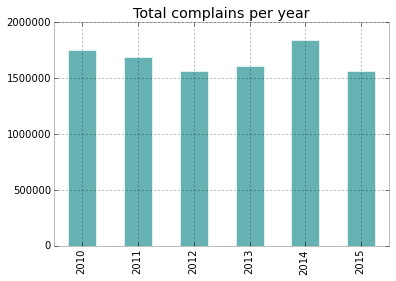

In [30]:
df['year'].value_counts().sort_index().plot(kind='bar', color='teal', alpha=.6, title='Total complains per year');

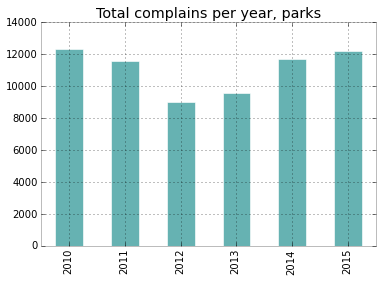

In [31]:
pdf['year'].value_counts().sort_index().plot(kind='bar', color='teal', alpha=.6, title='Total complains per year, parks');

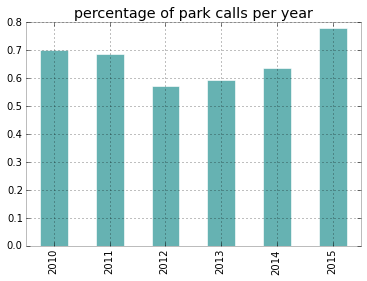

In [32]:
temp_complain_ratio = 100.0*(pdf['year'].value_counts()/df['year'].value_counts())
temp_complain_ratio.sort_index().plot(kind='bar', color='teal', alpha=.6, title='percentage of park calls per year');

### Seasonal fluctuation

In [33]:
#binning calls monthly

grouper = pd.TimeGrouper("1M", key='Created Date')

boro = pdf.groupby('Park Borough')

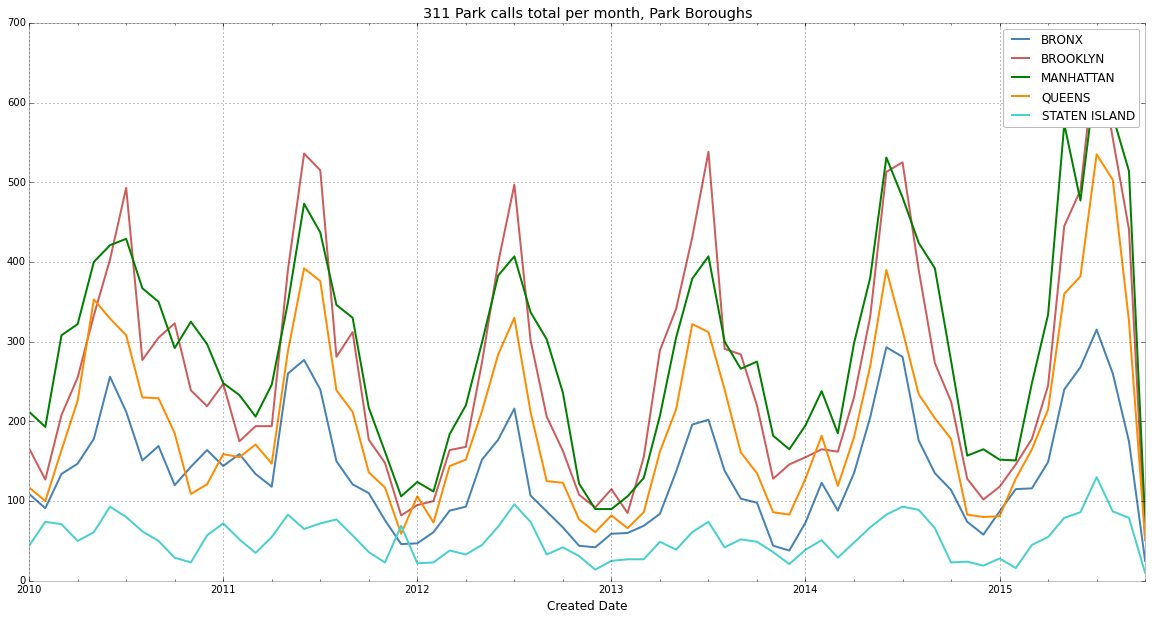

In [34]:
plt.figure(figsize=(20,10));


for name, g in boro:
    g.groupby(grouper).size().plot(label=name)
    
plt.title('311 Park calls total per month, Park Boroughs')
plt.legend();


### Time patterns per park

**TBD: year by department, year/month by type of complain**

In [48]:
parks = pdf.groupby('Park Facility Name')
len(parks)

3535

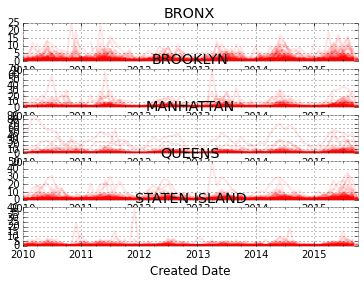

In [60]:
plt.figure(figsize=(10,10));
fig, axs = plt.subplots(5,1)

i=0
for Bname, g in boro:

    i+=1
    parks = g.groupby('Park Facility Name')
    for name, g in parks:
        g.groupby(grouper).size().plot(alpha=.1, color='red', ax=axs[i-1], title=Bname)
    
